<font size="5" color="green">Importing Data</font>

In [411]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('exams.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [412]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


checking missing data

In [413]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Data visualization

In [414]:
df.rename(columns={'race/ethnicity':'Race','gender':'Gender','parental level of education':'ParentsEducation'},inplace=True)
df.head(2)

,Gender,Race,ParentsEducation,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87


In [415]:
df.Race.value_counts()

Race
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64

In [416]:
df.ParentsEducation.value_counts()

ParentsEducation
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: count, dtype: int64

In [417]:
df['Race']=df['Race'].str.replace('group','')
df['ParentsEducation']=df['ParentsEducation'].str.replace('some','')

In [418]:
df.ParentsEducation.value_counts()

ParentsEducation
 college              224
high school           215
associate's degree    204
 high school          177
bachelor's degree     105
master's degree        75
Name: count, dtype: int64

In [419]:
df['ParentsEducation']=df.ParentsEducation.str.strip()

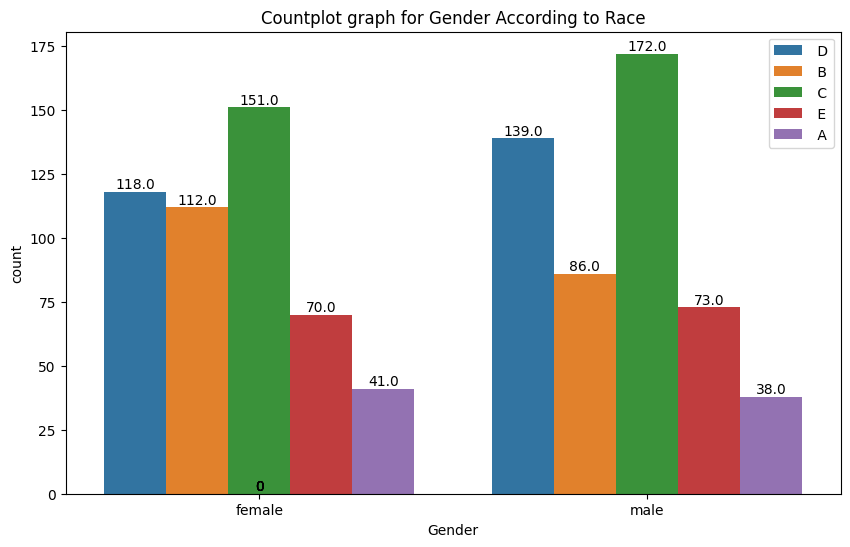

In [420]:


data = df 
column = 'Gender'
hue = 'Race'
text = 'Countplot graph for Gender According to Race'

plt.figure(figsize=(10, 6))
plt.title(text)

ax = sns.countplot(x=column, hue=hue, data=data)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="bottom")

plt.legend(loc='upper right')

plt.show()


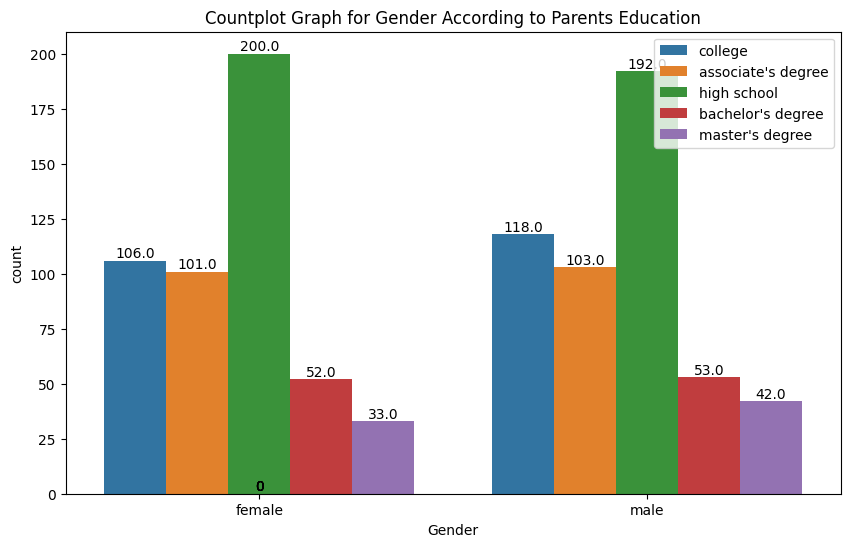

In [421]:
data = df 
column = 'Gender'
hue = 'ParentsEducation'
text = 'Countplot Graph for Gender According to Parents Education'

plt.figure(figsize=(10, 6))
plt.title(text)

ax = sns.countplot(x=column, hue=hue, data=data)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="bottom")

plt.legend(loc='upper right')

plt.show()

In [422]:
pd.crosstab(df.ParentsEducation,df.Race)

Race,A,B,C,D,E
ParentsEducation,,,,,
associate's degree,21,41,59,59,24
bachelor's degree,4,27,35,25,14
college,15,40,79,55,35
high school,35,76,125,98,58
master's degree,4,14,25,20,12


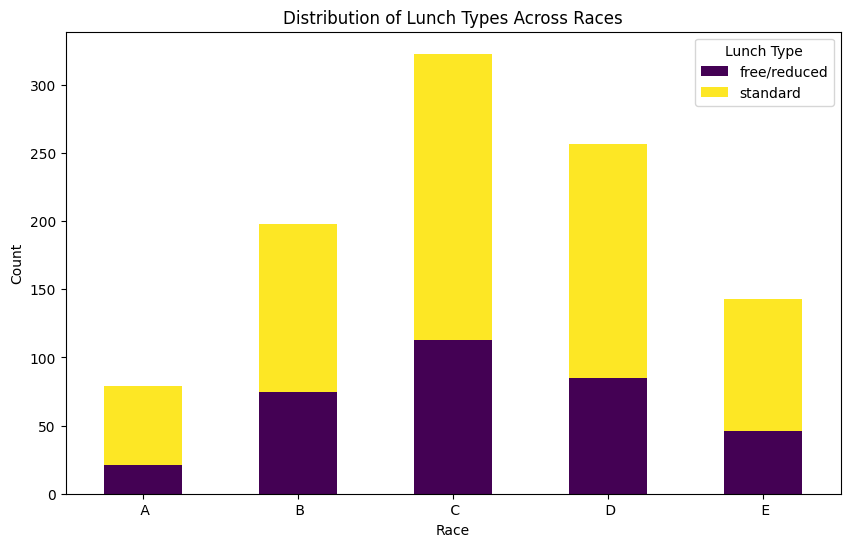

In [423]:
race_lunch_counts = df.groupby(['Race', 'lunch']).size().unstack(fill_value=0)

race_lunch_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribution of Lunch Types Across Races')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Lunch Type')
plt.xticks(rotation=0)
plt.show()

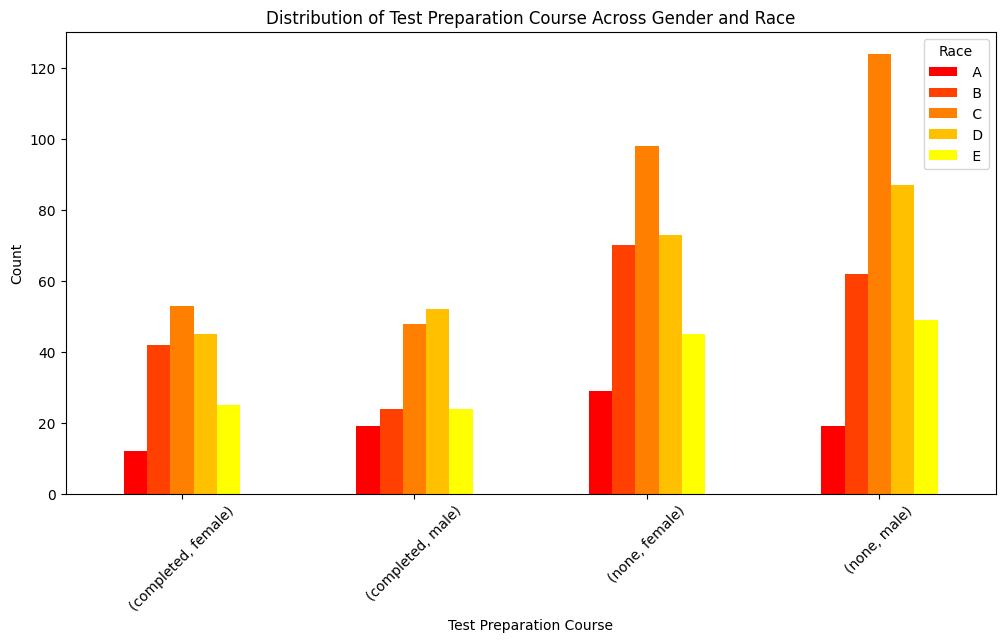

In [424]:
course_counts = df.groupby(['test preparation course', 'Gender', 'Race']).size().unstack(fill_value=0)

# Plot grouped bar plot
course_counts.plot(kind='bar', figsize=(12, 6), colormap='autumn')

# Add title and labels
plt.title('Distribution of Test Preparation Course Across Gender and Race')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')

# Show legend
plt.legend(title='Race')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

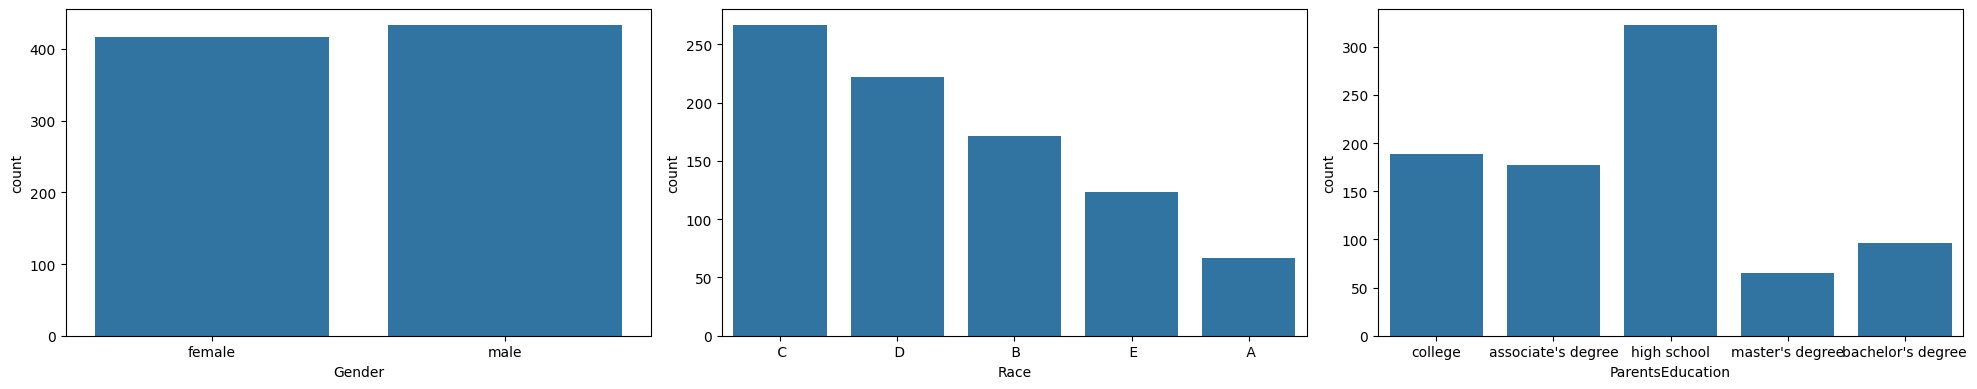

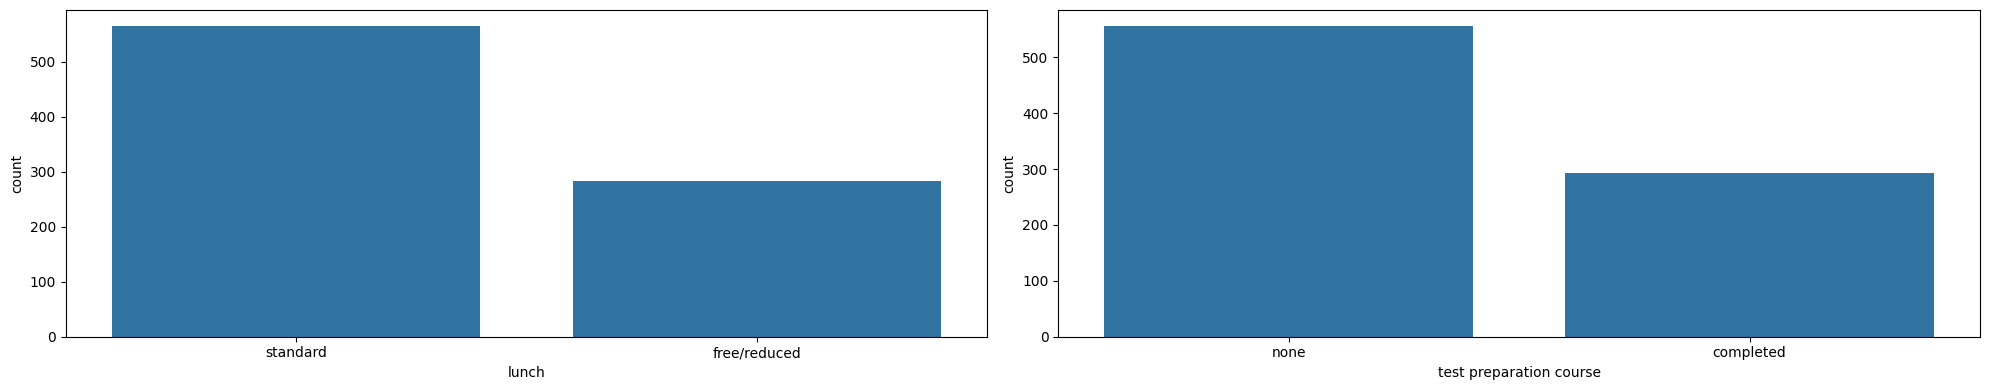

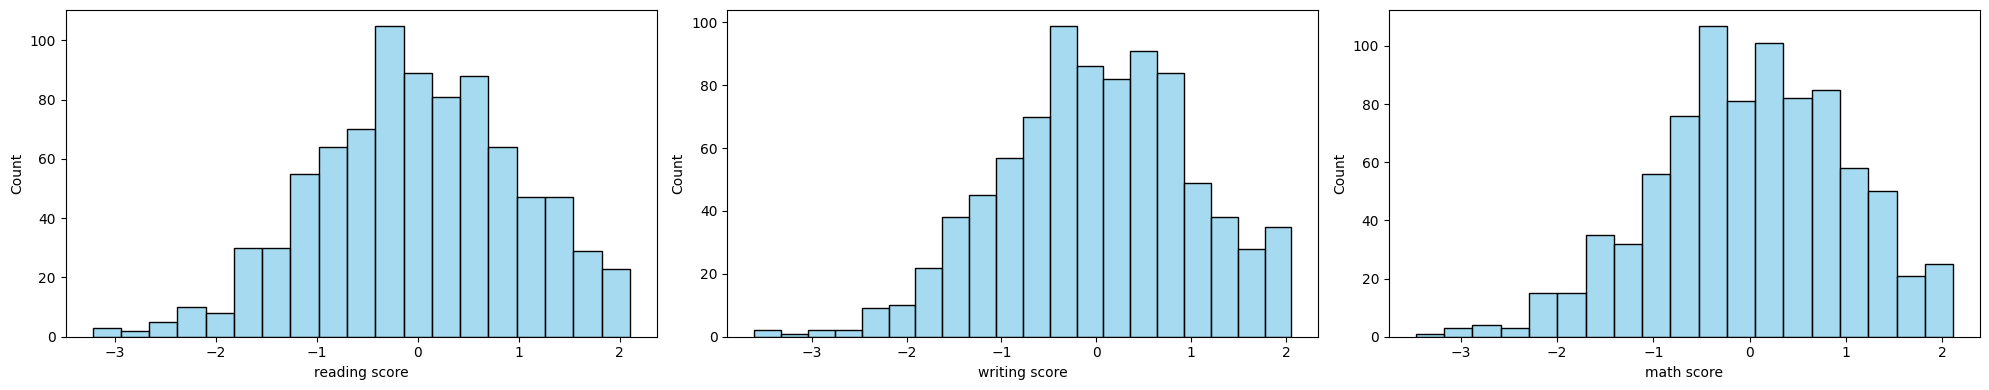

In [425]:
features=df.columns
fig1, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))


for j in range(3):
    sns.countplot(data=train, x=features[j], ax=axes1[j])

plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))


for j in range(3,5):
    sns.countplot(data=train, x=features[j], ax=axes2[j-3])

plt.tight_layout()
plt.show()


fig3, axes3 = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))


for j in range(5,len(features)):
    sns.histplot(data=train, x=features[j], ax=axes3[j-6], color='skyblue')

plt.tight_layout()
plt.show()

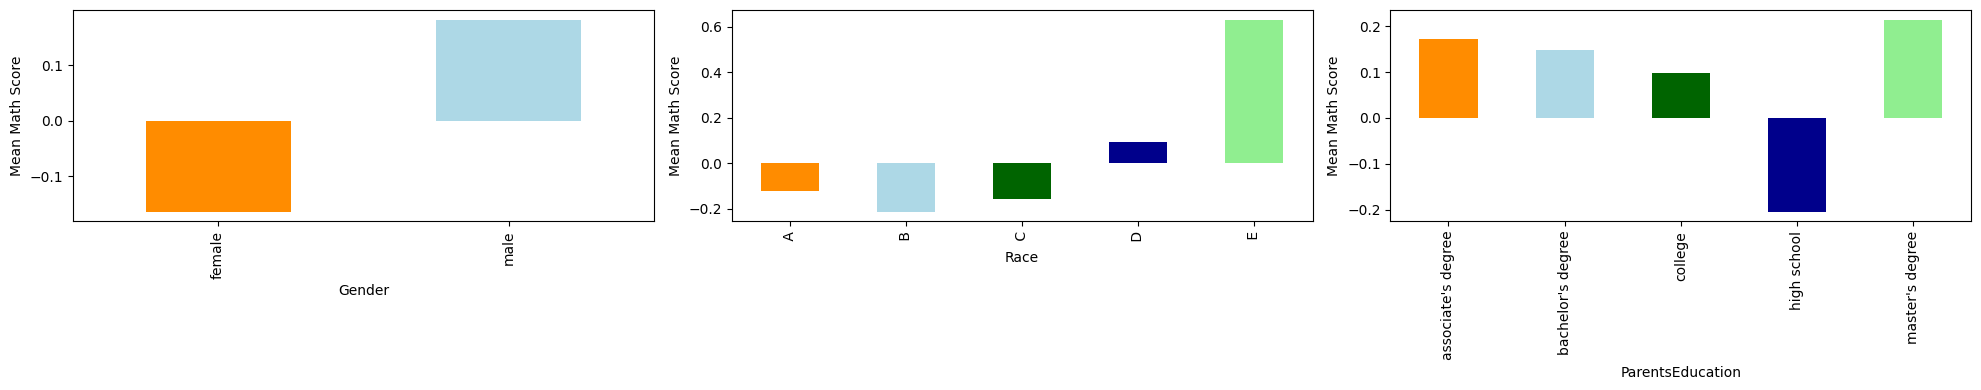

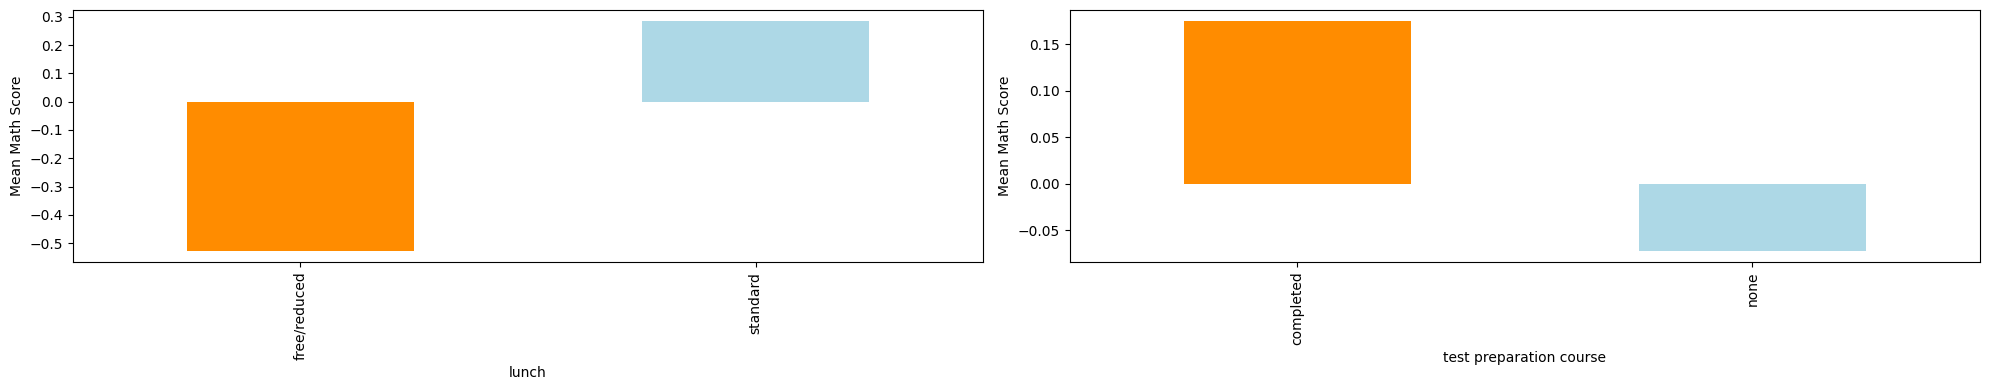

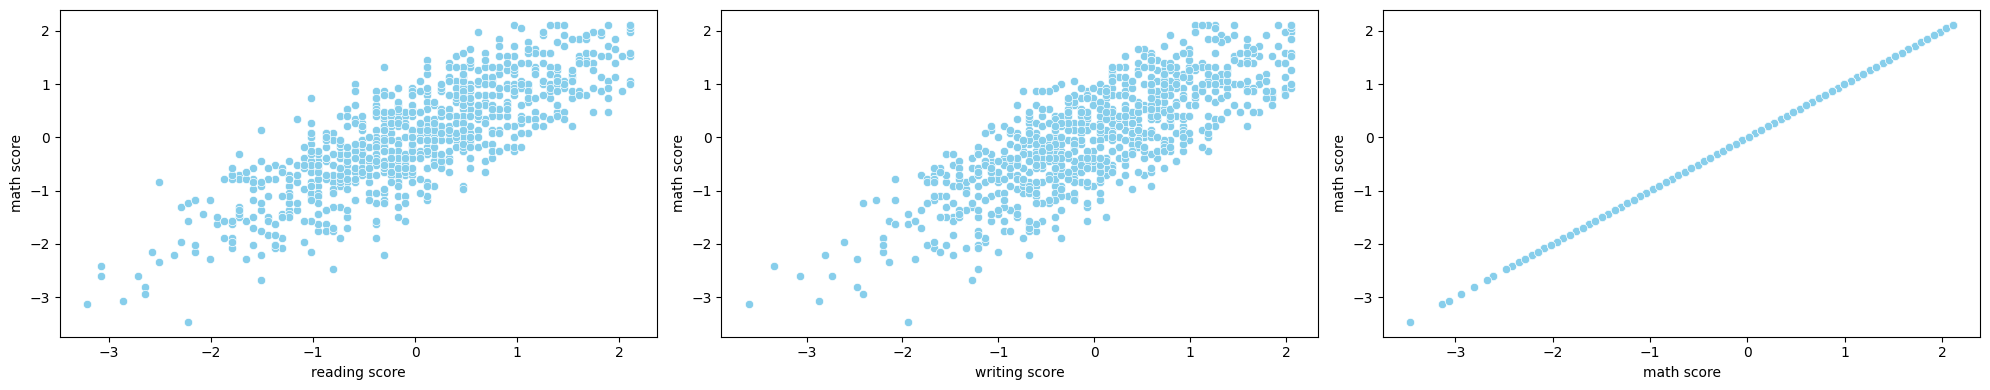

In [426]:
eatures=df.columns
fig1, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot countplots for the first 6 features on the first figure
colors=['darkorange','lightblue','darkgreen','darkblue','lightgreen']
for j in range(3):
    train.groupby(features[j])['math score'].mean().plot(kind='bar', color=colors, ax=axes1[j])
    axes1[j].set_ylabel('Mean Math Score')  # Set y-axis label

    

plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

# Plot countplots for the first 6 features on the first figure
for j in range(3,5):
    train.groupby(features[j])['math score'].mean().plot(kind='bar', color=colors, ax=axes2[j-3])
    axes2[j-3].set_ylabel('Mean Math Score')  # Set y-axis label


plt.tight_layout()
plt.show()



# Second Figure: 1 row with 2 columns
fig3, axes3 = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot histplots for the remaining 2 features on the second figure
for j in range(5,len(features)):
    sns.scatterplot(data=train, x=features[j],y='math score' ,ax=axes3[j-6], color='skyblue')
    

plt.tight_layout()
plt.show()

<Axes: >

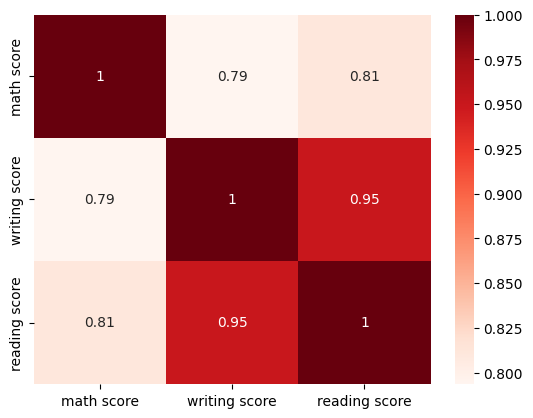

In [427]:
sns.heatmap(train[['math score','writing score','reading score']].corr(),cmap='Reds',annot=True)

<font size="5" color="green">Preprocessing</font>

Standardization

In [428]:
scaler = StandardScaler()
df[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])

Define categorical columns

In [429]:
categorical_cols = ['Gender', 'Race', 'ParentsEducation', 'lunch', 'test preparation course']


One-hot encode categorical columns

In [430]:
encoder = OneHotEncoder()
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]).toarray(), columns=encoder.get_feature_names_out(categorical_cols))



Concatenate encoded columns with original DataFrame

In [431]:
df_encoded = pd.concat([df, encoded_cols], axis=1)

Drop original categorical columns

In [432]:
df_encoded.drop(categorical_cols, axis=1, inplace=True)

Multicollinearity

In [433]:
correlation_matrix = df_encoded.corr().abs()

correlation matrix

<Axes: >

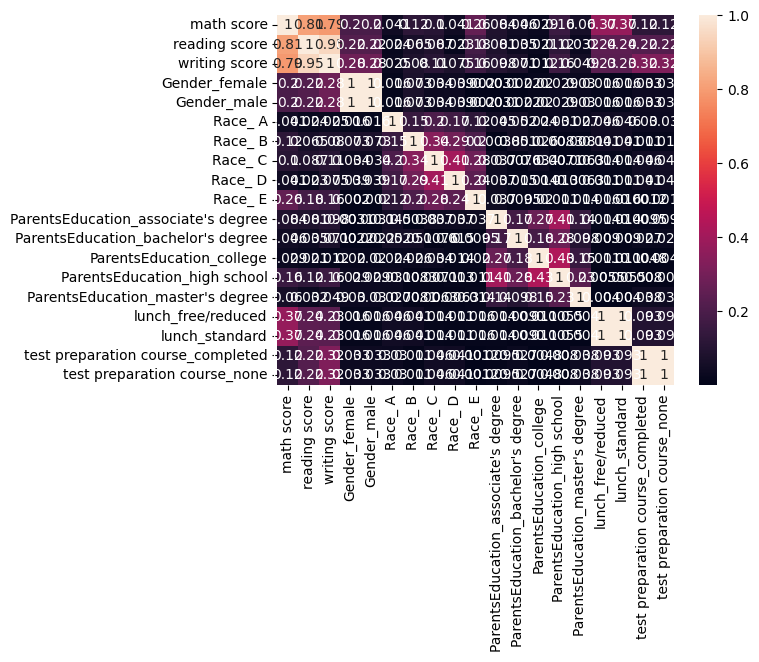

In [434]:
sns.heatmap(correlation_matrix, annot=True)

Splitting Data

In [435]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.15,random_state=50)

 <font size="5" color="green">Model Selection</font>

In [436]:
train_x=train.drop(columns=['math score'])
train_y=train['math score'].copy()
test_x=test.drop(columns=['math score'])
test_y=test['math score'].copy()

In [437]:


train_x['Gender'] = train_x['Gender'].replace({"male": 0, "female": 1})
test_x['Gender'] = test_x['Gender'].replace({"male": 0, "female": 1})

train_x['lunch'] = train_x['lunch'].replace({"standard": 0, "free/reduced": 1})
test_x['lunch'] = test_x['lunch'].replace({"standard": 0, "free/reduced": 1})

train_x['test preparation course'] = train_x['test preparation course'].replace({"none": 0, "completed": 1})
test_x['test preparation course'] = test_x['test preparation course'].replace({"none": 0, "completed": 1})

train_x['ParentsEducation'] = train_x['ParentsEducation'].replace({'somehigh': 0, 'high': 1, 'some': 2, 'associate\'s': 3, 'bachelor\'s': 4, 'master\'s': 5})
test_x['ParentsEducation'] = test_x['ParentsEducation'].replace({'somehigh': 0, 'high': 1, 'some': 2, 'associate\'s': 3, 'bachelor\'s': 4, 'master\'s': 5})

import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Race'])
encoded_train_x = encoder.fit_transform(train_x)
encoded_test_x = encoder.transform(test_x)


C:\Users\ANKRI\AppData\Local\Temp\ipykernel_15664\3524035676.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_x['Gender'] = train_x['Gender'].replace({"male": 0, "female": 1})
C:\Users\ANKRI\AppData\Local\Temp\ipykernel_15664\3524035676.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_x['Gender'] = test_x['Gender'].replace({"male": 0, "female": 1})
C:\Users\ANKRI\AppData\Local\Temp\ipykernel_15664\3524035676.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versio

Scaling Continous features

In [438]:
scaler=MinMaxScaler()

train_scaled_columns = scaler.fit_transform(encoded_train_x[['reading score', 'writing score']])
encoded_train_x[['reading score','writing score']] = train_scaled_columns

test_scaled_columns = scaler.transform(encoded_test_x[['reading score', 'writing score']])
encoded_test_x.loc[:, ['reading score','writing score']] = test_scaled_columns

In [439]:
encoded_train_x

,Gender,Race_0,Race_1,Race_2,ParentsEducation,lunch,test preparation course,reading score,writing score
264,1,0,0,1,college,0,0,0.786667,0.800000
469,0,0,1,0,associate's degree,0,1,0.573333,0.635294
144,1,0,1,0,associate's degree,0,0,0.413333,0.529412
901,1,0,1,0,high school,0,0,0.760000,0.776471
331,0,0,1,0,associate's degree,0,0,0.600000,0.564706
...,...,...,...,...,...,...,...,...,...
289,1,1,0,1,master's degree,0,0,0.600000,0.670588
109,0,1,0,0,college,0,0,0.746667,0.729412
907,0,0,1,0,high school,0,1,0.626667,0.611765
480,1,0,0,1,high school,0,0,0.066667,0.129412


Linear Regression

In [440]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoder on the categorical columns
encoded_train_x = encoder.fit_transform(train_x[categorical_cols]).toarray()
encoded_test_x = encoder.transform(test_x[categorical_cols]).toarray()

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(encoded_train_x, train_y)

# Make predictions on the training and test data
train_predicted = model.predict(encoded_train_x)
test_predicted = model.predict(encoded_test_x)

# Calculate the R^2 and MSE for the training data
train_r2 = model.score(encoded_train_x, train_y)
train_mse = mean_squared_error(train_y, train_predicted)

# Calculate the R^2 and MSE for the test data
test_r2 = model.score(encoded_test_x, test_y)
test_mse = mean_squared_error(test_y, test_predicted)
print("R2 :" ,test_r2)
print("MSE :" ,test_mse)

R2 : 0.28463819154032133
MSE : 0.7303515004655697


In [441]:
# For 'reading score'
train_x=train.drop(columns=['reading score'])
train_y=train['reading score'].copy()
test_x=test.drop(columns=['reading score'])
test_y=test['reading score'].copy()

In [442]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoder on the categorical columns
encoded_train_x = encoder.fit_transform(train_x[categorical_cols]).toarray()
encoded_test_x = encoder.transform(test_x[categorical_cols]).toarray()

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(encoded_train_x, train_y)

# Make predictions on the training and test data
train_predicted = model.predict(encoded_train_x)
test_predicted = model.predict(encoded_test_x)

# Calculate the R^2 and MSE for the training data
train_r2 = model.score(encoded_train_x, train_y)
train_mse = mean_squared_error(train_y, train_predicted)

# Calculate the R^2 and MSE for the test data
test_r2 = model.score(encoded_test_x, test_y)
test_mse = mean_squared_error(test_y, test_predicted)
print("R2 :" ,test_r2)
print("MSE :" ,test_mse)

R2 : 0.11027672250282972
MSE : 0.8009413788376101


In [443]:
# For 'writing score'
train_x=train.drop(columns=['writing score'])
train_y=train['writing score'].copy()
test_x=test.drop(columns=['writing score'])
test_y=test['writing score'].copy()

In [444]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoder on the categorical columns
encoded_train_x = encoder.fit_transform(train_x[categorical_cols]).toarray()
encoded_test_x = encoder.transform(test_x[categorical_cols]).toarray()

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(encoded_train_x, train_y)

# Make predictions on the training and test data
train_predicted = model.predict(encoded_train_x)
test_predicted = model.predict(encoded_test_x)

# Calculate the R^2 and MSE for the training data
train_r2 = model.score(encoded_train_x, train_y)
train_mse = mean_squared_error(train_y, train_predicted)

# Calculate the R^2 and MSE for the test data
test_r2 = model.score(encoded_test_x, test_y)
test_mse = mean_squared_error(test_y, test_predicted)
print("R2 :" ,test_r2)
print("MSE :" ,test_mse)

R2 : 0.2117058101452166
MSE : 0.6877904781048159
